https://arxiv.org/pdf/2303.07741.pdf (review)
https://arxiv.org/pdf/2102.01709v2.pdf (map)

The polarization angle $\chi \equiv 1/2 \arctan{U/Q}$ gets rotated due to a rotation measure in a wavelength-dependent way: 
$$\Delta \chi = \mathrm{RM} \lambda^2$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
c = 299792458  # m/s
RM = 100  # rad / m^2
width = 25e3 / 64  # channel width of zoomable region (Hz)
nchans = 64
fmin = 30e6
freqs = np.linspace(0, width * (nchans-1), nchans) + fmin # Hz
lambda_sq = c**2 / freqs**2
dlambda = lambda_sq - lambda_sq[-1]
angle = RM * dlambda

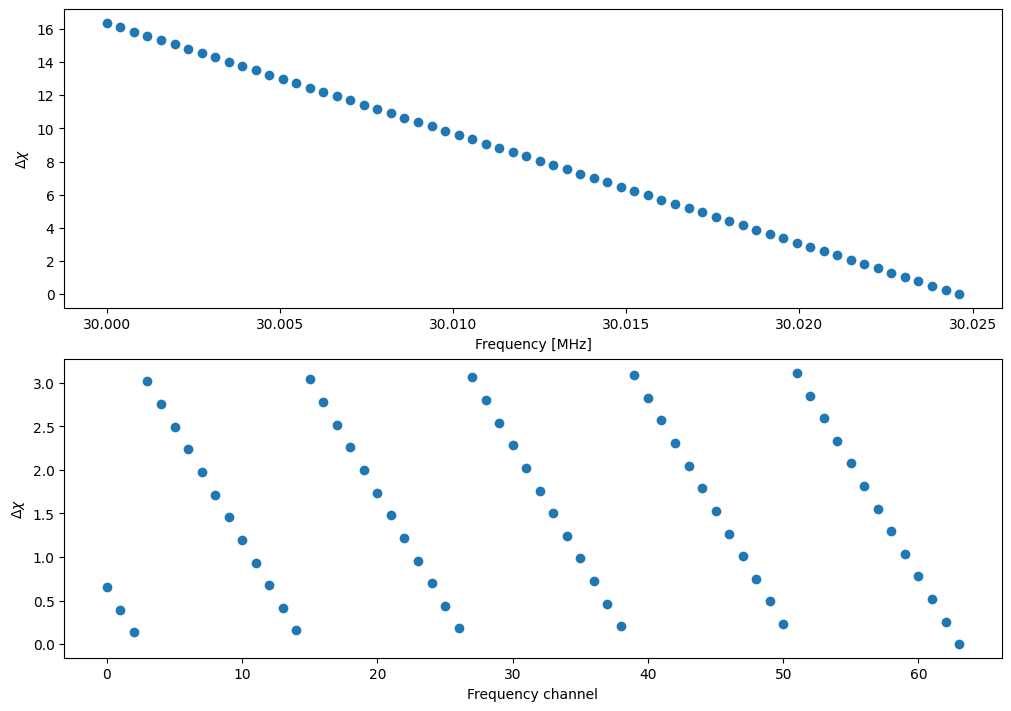

In [3]:
fig, axs = plt.subplots(figsize=(10,7), nrows=2, constrained_layout=True)
axs[0].scatter(freqs / 1e6, angle)
axs[0].set_xlabel("Frequency [MHz]")
axs[0].set_ylabel("$\\Delta \chi$")
axs[1].scatter(np.arange(freqs.size), angle % np.pi)
axs[1].set_xlabel("Frequency channel")
axs[1].set_ylabel("$\\Delta \chi$")
plt.show()

### Can we phase-resolve a given combination of minimum frequency and RM?

The Faraday rotation is linear in $\lambda^2$ with slope given by the rotation measure. At low frequencies, the change in $\lambda^2$ between channels is larger than at high frequencies. A small RM can counter this effect. We define the rotation as phase-resolvable if we have at least $N$ measurements per full cycle (i.e. $2\pi$ change in 2$\chi$ — NOTE: the phase of the polarization vector is $2\chi$).

$$\Delta \chi = \mathrm{RM} \lambda^2 \\
\pi \geq \mathrm{RM} c^2 \left(\frac{1}{\nu_{\rm min}^2} - \frac{1}{\left(\nu_{\rm min} + N \Delta \nu\right)^2}\right) $$

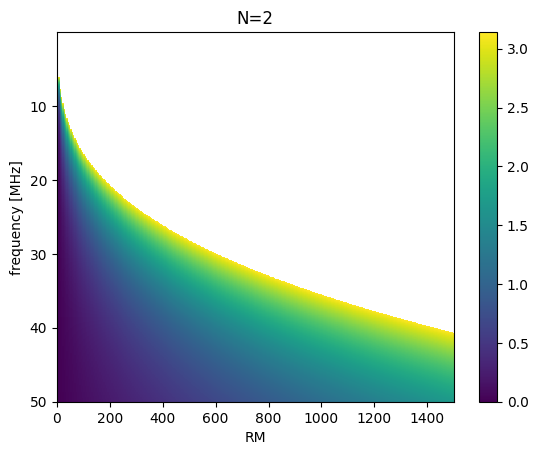

In [4]:
N = 2  # number of measurements per cycle as condition
numin = np.linspace(0, 50, 2048) * 1e6  # the frequency channels
numin = numin[1:, None]  # the zoom can't start at nu=0 (lambda=infinity) + add axis for broadcasting
RMs = np.linspace(0, 1500, num=300)[None]  # negative RM is symmetric, add axis for broadcasting
numax = numin + N * width
dchi = RMs * c**2 * (1 / numin**2 - 1 / numax**2)
dchi[dchi >= np.pi] = np.nan

plt.figure()
im = plt.imshow(
    dchi, aspect="auto", interpolation="none", extent=[RMs.min(), RMs.max(), numin.max()/1e6, numin.min()/1e6]
)
im.set_clim(0, np.pi)
plt.colorbar()
plt.xlabel("RM")
plt.ylabel("frequency [MHz]")
plt.title(f"{N=}")
plt.show()

### Dependence on channel width

In [5]:
numin.shape

(2047, 1)

In [7]:
dchi.shape

(2047, 50)

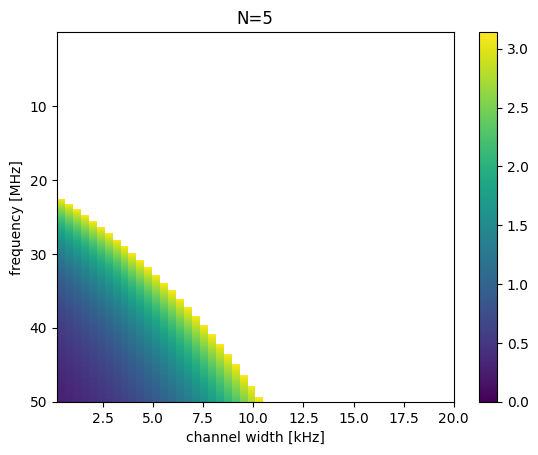

In [12]:
RM = 200
N = 5
widths = np.geomspace(200, 20e3)
numax = numin + N * widths[None]


dchi = RM * c**2 * (1 / numin**2 - 1 / numax**2)
dchi[dchi >= np.pi] = np.nan

plt.figure()
im = plt.imshow(
    dchi, aspect="auto", interpolation="none", extent=[widths.min()/1e3, widths.max()/1e3, numin.max()/1e6, numin.min()/1e6]
)
im.set_clim(0, np.pi)
plt.colorbar()
plt.xlabel("channel width [kHz]")
plt.ylabel("frequency [MHz]")
plt.title(f"{N=}")
plt.show()